In [9]:
from typing import TypedDict

In [10]:
# Defining State
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    cvt_unit: str
    total: float

In [11]:
# Defining nodes to handle state
def calc_total(state:PortfolioState) -> PortfolioState:
    state['total_usd'] = state['amount_usd'] * 1.8
    return state


def cvt_total_inr(state:PortfolioState) -> PortfolioState:
    state['total'] = state['amount_usd'] * 85
    return state


def cvt_total_uer(state:PortfolioState) -> PortfolioState:
    state['total'] = state['amount_usd'] * 0.9
    return state

In [12]:
# Condition supporting function
def cvt_type(state: PortfolioState) ->str:
    return state['cvt_unit']

In [13]:
# Creating graph
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

In [14]:
# Adding the nodes to the blank graph
builder.add_node('total_calc', calc_total)
builder.add_node('convert_to_inr', cvt_total_inr)
builder.add_node('convert_to_uer', cvt_total_uer)


# Connecting nodes through edges
builder.add_edge(START, 'total_calc')

# Conditional edge addition
builder.add_conditional_edges('total_calc', cvt_type, {"inr": "convert_to_inr", "uer": "convert_to_uer"})
builder.add_edge(['convert_to_inr', 'convert_to_uer'], END)

In [15]:
graph = builder.compile()

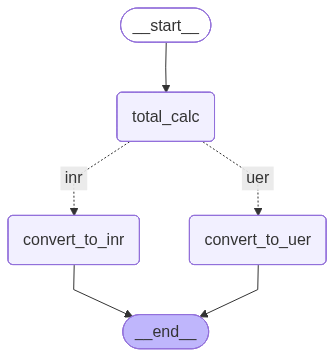

In [16]:
# Visualising the graph
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [17]:
graph.invoke({'amount_usd': 700, 'cvt_unit': 'inr'})

{'amount_usd': 700, 'total_usd': 1260.0, 'cvt_unit': 'inr', 'total': 59500}

In [18]:
graph.invoke({'amount_usd': 700, 'cvt_unit': 'uer'})

{'amount_usd': 700, 'total_usd': 1260.0, 'cvt_unit': 'uer', 'total': 630.0}